This file will be used for Capstone project

In [1]:
#pip install geopy
import numpy as np # library to handle data in a vectorized manner
#pip install geopandas

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


Get the coordinates of Edison, NJ

In [3]:
address = 'Edison, NJ'

geolocator = Nominatim(user_agent="nj_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Edison are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edison are 40.5382375, -74.39451734508772.


Get Restaurants in Edison

In [4]:
CLIENT_ID = 'MQ4NB3XEMXXG53OXAC4FY11VDQH5BADH1VZJWEDOEF3SA5WR' # your Foursquare ID
CLIENT_SECRET = '11QWSPNHVMHGHJJWYSHVFGL3AA0VZGM0O2VX3IKM5F52R1DG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [5]:
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&query={}&radius={}&categoryid={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,  
    LIMIT,
    'Restaurant', 5000, '4d4b7105d754a06374d81259')
url

'https://api.foursquare.com/v2/venues/search?&client_id=MQ4NB3XEMXXG53OXAC4FY11VDQH5BADH1VZJWEDOEF3SA5WR&client_secret=11QWSPNHVMHGHJJWYSHVFGL3AA0VZGM0O2VX3IKM5F52R1DG&v=20180605&ll=40.5382375,-74.39451734508772&limit=100&query=Restaurant&radius=5000&categoryid=4d4b7105d754a06374d81259'

In [6]:
# make the GET request
        #results = requests.get(url).json()["response"]['groups'][0]['items']
     results = requests.get(url).json()["response"]['venues']
     

In [7]:
#d1 = json.dumps(results)
#data = json.loads(d1)
#data1 = json.loads(results)
#print(data['name'])

#data1 = pd.DataFrame(results)
#data1.head()

# tranform venues into a dataframe
dataframe = pd.json_normalize(results)
dataframe.head()


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4b4745d4f964a520ed2d26e3,Restaurant Depot,"[{'id': '58daa1558bbb0b01f18ec1b4', 'name': 'K...",v-1598212362,False,1760 New Durham Rd,at West St.,40.546399,-74.421748,"[{'label': 'display', 'lat': 40.54639903890142...",2476,07080,US,South Plainfield,NJ,United States,"[1760 New Durham Rd (at West St.), South Plain...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4f3217f819836c91c7b5271a,Quick Quality Restaurant,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1598212362,False,2 Ethel Rd,NaN,40.540949,-74.395202,"[{'label': 'display', 'lat': 40.540949, 'lng':...",307,08817,US,Edison,NJ,United States,"[2 Ethel Rd, Edison, NJ 08817, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4f32aeb819836c91c7ef79a7,Frank's Pizza & Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1598212362,False,518 Old Post Road,NaN,40.515569,-74.376877,"[{'label': 'display', 'lat': 40.515569, 'lng':...",2931,08817,US,Edison,NJ,United States,"[518 Old Post Road, Edison, NJ 08817, United S...",1628131,https://www.grubhub.com/restaurant/franks-pizz...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
3,4e4e5b41bd4101d0d7a8677f,AACHIS INDIAN RESTAURANT,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1598212362,False,128 Talmadge Rd,NaN,40.533360,-74.394798,"[{'label': 'display', 'lat': 40.53335952758789...",543,08817,US,Edison,NJ,United States,"[128 Talmadge Rd, Edison, NJ 08817, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4c74496f2db5236ae2ecb979,Attilio's Pizza & Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1598212362,False,561 US Highway 1,at Wick Plaza,40.506488,-74.398523,"[{'label': 'display', 'lat': 40.50648776184522...",3550,08817,US,Edison,NJ,United States,"[561 US Highway 1 (at Wick Plaza), Edison, NJ ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
dataframe_filtered.head()
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
dataframe_filtered.head()

,name,categories,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,id
0,Restaurant Depot,"[{'id': '58daa1558bbb0b01f18ec1b4', 'name': 'K...",1760 New Durham Rd,at West St.,40.546399,-74.421748,"[{'label': 'display', 'lat': 40.54639903890142...",2476,07080,US,South Plainfield,NJ,United States,"[1760 New Durham Rd (at West St.), South Plain...",4b4745d4f964a520ed2d26e3
1,Quick Quality Restaurant,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",2 Ethel Rd,NaN,40.540949,-74.395202,"[{'label': 'display', 'lat': 40.540949, 'lng':...",307,08817,US,Edison,NJ,United States,"[2 Ethel Rd, Edison, NJ 08817, United States]",4f3217f819836c91c7b5271a
2,Frank's Pizza & Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",518 Old Post Road,NaN,40.515569,-74.376877,"[{'label': 'display', 'lat': 40.515569, 'lng':...",2931,08817,US,Edison,NJ,United States,"[518 Old Post Road, Edison, NJ 08817, United S...",4f32aeb819836c91c7ef79a7
3,AACHIS INDIAN RESTAURANT,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",128 Talmadge Rd,NaN,40.533360,-74.394798,"[{'label': 'display', 'lat': 40.53335952758789...",543,08817,US,Edison,NJ,United States,"[128 Talmadge Rd, Edison, NJ 08817, United Sta...",4e4e5b41bd4101d0d7a8677f
4,Attilio's Pizza & Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",561 US Highway 1,at Wick Plaza,40.506488,-74.398523,"[{'label': 'display', 'lat': 40.50648776184522...",3550,08817,US,Edison,NJ,United States,"[561 US Highway 1 (at Wick Plaza), Edison, NJ ...",4c74496f2db5236ae2ecb979


In [10]:
# Category column is a json data. To get Category --> Name property form this, filter the category for each row and get the category names
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
dataframe_filtered.head()

,name,categories,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,id
0,Restaurant Depot,Kitchen Supply Store,1760 New Durham Rd,at West St.,40.546399,-74.421748,"[{'label': 'display', 'lat': 40.54639903890142...",2476,07080,US,South Plainfield,NJ,United States,"[1760 New Durham Rd (at West St.), South Plain...",4b4745d4f964a520ed2d26e3
1,Quick Quality Restaurant,Food,2 Ethel Rd,NaN,40.540949,-74.395202,"[{'label': 'display', 'lat': 40.540949, 'lng':...",307,08817,US,Edison,NJ,United States,"[2 Ethel Rd, Edison, NJ 08817, United States]",4f3217f819836c91c7b5271a
2,Frank's Pizza & Restaurant,Italian Restaurant,518 Old Post Road,NaN,40.515569,-74.376877,"[{'label': 'display', 'lat': 40.515569, 'lng':...",2931,08817,US,Edison,NJ,United States,"[518 Old Post Road, Edison, NJ 08817, United S...",4f32aeb819836c91c7ef79a7
3,AACHIS INDIAN RESTAURANT,Indian Restaurant,128 Talmadge Rd,NaN,40.533360,-74.394798,"[{'label': 'display', 'lat': 40.53335952758789...",543,08817,US,Edison,NJ,United States,"[128 Talmadge Rd, Edison, NJ 08817, United Sta...",4e4e5b41bd4101d0d7a8677f
4,Attilio's Pizza & Restaurant,Italian Restaurant,561 US Highway 1,at Wick Plaza,40.506488,-74.398523,"[{'label': 'display', 'lat': 40.50648776184522...",3550,08817,US,Edison,NJ,United States,"[561 US Highway 1 (at Wick Plaza), Edison, NJ ...",4c74496f2db5236ae2ecb979


In [11]:
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Restaurant Depot,Kitchen Supply Store,1760 New Durham Rd,at West St.,40.546399,-74.421748,"[{'label': 'display', 'lat': 40.54639903890142...",2476,07080,US,South Plainfield,NJ,United States,"[1760 New Durham Rd (at West St.), South Plain...",4b4745d4f964a520ed2d26e3
1,Quick Quality Restaurant,Food,2 Ethel Rd,NaN,40.540949,-74.395202,"[{'label': 'display', 'lat': 40.540949, 'lng':...",307,08817,US,Edison,NJ,United States,"[2 Ethel Rd, Edison, NJ 08817, United States]",4f3217f819836c91c7b5271a
2,Frank's Pizza & Restaurant,Italian Restaurant,518 Old Post Road,NaN,40.515569,-74.376877,"[{'label': 'display', 'lat': 40.515569, 'lng':...",2931,08817,US,Edison,NJ,United States,"[518 Old Post Road, Edison, NJ 08817, United S...",4f32aeb819836c91c7ef79a7
3,AACHIS INDIAN RESTAURANT,Indian Restaurant,128 Talmadge Rd,NaN,40.533360,-74.394798,"[{'label': 'display', 'lat': 40.53335952758789...",543,08817,US,Edison,NJ,United States,"[128 Talmadge Rd, Edison, NJ 08817, United Sta...",4e4e5b41bd4101d0d7a8677f
4,Attilio's Pizza & Restaurant,Italian Restaurant,561 US Highway 1,at Wick Plaza,40.506488,-74.398523,"[{'label': 'display', 'lat': 40.50648776184522...",3550,08817,US,Edison,NJ,United States,"[561 US Highway 1 (at Wick Plaza), Edison, NJ ...",4c74496f2db5236ae2ecb979


After getting restaurants data, fill it in below folium map

In [12]:
# create map of Manhattan using latitude and longitude values

#venues_list
map_edison = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dataframe_filtered['lat'], dataframe_filtered['lng'], dataframe_filtered['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_edison)  
    
map_edison

In [36]:
edison_grouped = dataframe_filtered.groupby('categories').mean().reset_index()
edison_grouped

,categories,lat,lng,distance
0,Asian Restaurant,40.544740,-74.392365,3744.00
1,Brazilian Restaurant,40.586483,-74.418775,5749.00
2,Breakfast Spot,40.479919,-74.409005,6606.00
3,Business Service,40.553336,-74.417479,2568.00
4,Chinese Restaurant,40.539805,-74.394199,3336.25
5,Dim Sum Restaurant,40.521146,-74.394329,1902.00
6,Diner,40.561309,-74.396229,4088.00
7,Food,40.524083,-74.399204,2339.40
8,Food Court,40.516119,-74.376708,2886.00
9,Halal Restaurant,40.532657,-74.340746,4591.00


In [14]:
# set number of clusters
kclusters = 10

edison_grouped_clustering = edison_grouped.drop('categories', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(edison_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 7, 3, 0, 9, 5, 6, 0, 4, 1], dtype=int32)

In [40]:
# create a new dataframe
edison_venues_sorted = pd.DataFrame(columns=['categories'])
edison_venues_sorted['categories'] = edison_grouped['categories']
edison_venues_sorted

,categories
0,Asian Restaurant
1,Brazilian Restaurant
2,Breakfast Spot
3,Business Service
4,Chinese Restaurant
5,Dim Sum Restaurant
6,Diner
7,Food
8,Food Court
9,Halal Restaurant


In [41]:
# add clustering labels
edison_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
edison_venues_sorted



,Cluster Labels,categories
0,2,Asian Restaurant
1,7,Brazilian Restaurant
2,3,Breakfast Spot
3,0,Business Service
4,9,Chinese Restaurant
5,5,Dim Sum Restaurant
6,6,Diner
7,0,Food
8,4,Food Court
9,1,Halal Restaurant


In [ ]:
dataframe_merged = dataframe_filtered


dataframe_merged = dataframe_merged.join(edison_venues_sorted.set_index('categories'), on='categories')

dataframe_merged.head() # check the last columns!

In [17]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dataframe_merged['lat'], dataframe_merged['lng'], dataframe_merged['categories'], dataframe_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


Now lets study the clusters
Cluster 1

In [18]:
dataframe_merged.loc[dataframe_merged['Cluster Labels'] == 0, dataframe_merged.columns[[1] + list(range(5, dataframe_merged.shape[1]))]]

,categories,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
0,Kitchen Supply Store,-74.421748,"[{'label': 'display', 'lat': 40.54639903890142...",2476,07080,US,South Plainfield,NJ,United States,"[1760 New Durham Rd (at West St.), South Plain...",4b4745d4f964a520ed2d26e3,0
1,Food,-74.395202,"[{'label': 'display', 'lat': 40.540949, 'lng':...",307,08817,US,Edison,NJ,United States,"[2 Ethel Rd, Edison, NJ 08817, United States]",4f3217f819836c91c7b5271a,0
3,Indian Restaurant,-74.394798,"[{'label': 'display', 'lat': 40.53335952758789...",543,08817,US,Edison,NJ,United States,"[128 Talmadge Rd, Edison, NJ 08817, United Sta...",4e4e5b41bd4101d0d7a8677f,0
5,Indian Restaurant,-74.394934,"[{'label': 'display', 'lat': 40.5329, 'lng': -...",595,08817,US,Edison,NJ,United States,"[128 Talmadge Rd, Edison, NJ 08817, United Sta...",4f328e8319836c91c7e363ec,0
10,Food,-74.376539,"[{'label': 'display', 'lat': 40.535789, 'lng':...",1545,08840,US,Metuchen,NJ,United States,"[24 Bridge St, Metuchen, NJ 08840, United States]",4f32ad5d19836c91c7eef9e2,0
13,Indian Restaurant,-74.422166,"[{'label': 'display', 'lat': 40.53816454878811...",2339,08854,US,Piscataway,NJ,United States,"[1412 Stelton Rd, Piscataway, NJ 08854, United...",50887383e4b05809a3be14c0,0
14,Food,-74.418762,"[{'label': 'display', 'lat': 40.53394317626953...",2106,08854,US,Piscataway,NJ,United States,"[1665 Stelton Rd, Piscataway, NJ 08854, United...",4f323f5519836c91c7c4beca,0
20,Business Service,-74.417479,"[{'label': 'display', 'lat': 40.5533355, 'lng'...",2568,07080,US,South Plainfield,NJ,United States,"[50 Cragwood Rd, South Plainfield, NJ 07080, U...",5c41f652065ef5002c7074be,0
27,Indian Restaurant,-74.391223,"[{'label': 'display', 'lat': 40.575348, 'lng':...",4140,07080,US,South Plainfield,NJ,United States,"[3600 Park Ave, South Plainfield, NJ 07080, Un...",4c5e056fd25320a1ebd7c77a,0
34,Food,-74.411746,"[{'label': 'display', 'lat': 40.508801, 'lng':...",3586,08817,US,Edison,NJ,United States,"[1630 State Route 27, Edison, NJ 08817, United...",4f32342519836c91c7c05c11,0


Cluster 2

In [19]:
dataframe_merged.loc[dataframe_merged['Cluster Labels'] == 1, dataframe_merged.columns[[1] + list(range(5, dataframe_merged.shape[1]))]]

,categories,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
12,Restaurant,-74.408714,"[{'label': 'display', 'lat': 40.48004913330078...",6587,08816,US,East Brunswick,NJ,United States,"[3 Tower Center Blvd, East Brunswick, NJ 08816...",5731236fcd10ed5567ed7022,1
23,Restaurant,-74.412730,"[{'label': 'display', 'lat': 40.52134, 'lng': ...",2431,08817,US,Edison,NJ,United States,"[433 Plainfield Ave, Edison, NJ 08817, United ...",4e218c7ad22d0a3f59f8c84b,1
36,Halal Restaurant,-74.340746,"[{'label': 'display', 'lat': 40.53265740139449...",4591,08837,US,Edison,NJ,United States,"[159 Jackson Ave (Amboy Ave), Edison, NJ 08837...",4b9d228df964a520ae9236e3,1
43,Restaurant,-74.442851,"[{'label': 'display', 'lat': 40.55974348595462...",4737,NaN,US,NaN,New Jersey,United States,"[New Jersey, United States]",4e221424b61cdcf1ecc50718,1
44,Seafood Restaurant,-74.414925,"[{'label': 'display', 'lat': 40.576763, 'lng':...",4622,07080,US,South Plainfield,NJ,United States,"[South Plainfield, NJ 07080, United States]",5a6286dad41bb7176411855c,1


Cluster 3

In [20]:
dataframe_merged.loc[dataframe_merged['Cluster Labels'] == 2, dataframe_merged.columns[[1] + list(range(5, dataframe_merged.shape[1]))]]

,categories,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
21,Pizza Place,-74.361525,"[{'label': 'display', 'lat': 40.540961, 'lng':...",2807,08840,US,Metuchen,NJ,United States,"[399 Main St, Metuchen, NJ 08840, United States]",4f32241819836c91c7ba2a25,2
28,Pizza Place,-74.382889,"[{'label': 'display', 'lat': 40.56489181518555...",3125,08820,US,Edison,NJ,United States,"[3 Stephenville Pkwy, Edison, NJ 08820, United...",54b1b667498e00b8704886f9,2
29,Asian Restaurant,-74.377088,"[{'label': 'display', 'lat': 40.57630353572045...",4486,08820,US,Edison,NJ,United States,"[2093-2099 County Road 604 (East), Edison, NJ ...",4c56f6886418a593cb3b7e0e,2
30,Asian Restaurant,-74.407642,"[{'label': 'display', 'lat': 40.51317656338285...",3002,08817,US,Edison,NJ,United States,"[1761 State Route 27, Edison, NJ 08817, United...",4d23b74275526dcb9c8203a9,2
31,Health Food Store,-74.434912,"[{'label': 'display', 'lat': 40.5507986, 'lng'...",3692,08854,US,Piscataway Township,NJ,United States,"[1372 Centennial Avenue, Piscataway Township, ...",57f20834498e48e3c5d31a40,2
33,Pizza Place,-74.371848,"[{'label': 'display', 'lat': 40.5082761190556,...",3847,08817,US,Edison,NJ,United States,"[2595 Woodbridge Ave, Edison, NJ 08817, United...",4eb7180a61af0dda91131eae,2
35,Pizza Place,-74.388677,"[{'label': 'display', 'lat': 40.50261346821907...",3996,08817,US,Edison,NJ,United States,"[2303 Woodbridge Ave (rutland st.), Edison, NJ...",4b9fbb67f964a520733937e3,2
40,Pizza Place,-74.389222,"[{'label': 'display', 'lat': 40.57797710519222...",4446,07080,US,South Plainfield,NJ,United States,"[716 Oak Tree Ave (at Park Ave.), South Plainf...",4b05d3a5f964a52009e422e3,2


Cluster 4

In [21]:
dataframe_merged.loc[dataframe_merged['Cluster Labels'] == 3, dataframe_merged.columns[[1] + list(range(5, dataframe_merged.shape[1]))]]

,categories,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
22,Breakfast Spot,-74.409005,"[{'label': 'display', 'lat': 40.47991872670491...",6606,08816,US,East Brunswick,NJ,United States,"[2 Tower Center Blvd, East Brunswick, NJ 08816...",4eb68f0ef5b94bd85c47c665,3


Cluster 5

In [22]:
dataframe_merged.loc[dataframe_merged['Cluster Labels'] == 4, dataframe_merged.columns[[1] + list(range(5, dataframe_merged.shape[1]))]]

,categories,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
2,Italian Restaurant,-74.376877,"[{'label': 'display', 'lat': 40.515569, 'lng':...",2931,08817,US,Edison,NJ,United States,"[518 Old Post Road, Edison, NJ 08817, United S...",4f32aeb819836c91c7ef79a7,4
4,Italian Restaurant,-74.398523,"[{'label': 'display', 'lat': 40.50648776184522...",3550,08817,US,Edison,NJ,United States,"[561 US Highway 1 (at Wick Plaza), Edison, NJ ...",4c74496f2db5236ae2ecb979,4
15,Italian Restaurant,-74.369867,"[{'label': 'display', 'lat': 40.54377261792961...",2174,08840,US,Metuchen,NJ,United States,"[Central Ave (Durham), Metuchen, NJ 08840, Uni...",50e8d94fe4b0e53293637c8c,4
18,Food Court,-74.376708,"[{'label': 'display', 'lat': 40.516119, 'lng':...",2886,08817,US,Edison,NJ,United States,"[518 Old Post Rd, Edison, NJ 08817, United Sta...",5ae500288fb09e002c5ef920,4
19,Vegetarian / Vegan Restaurant,-74.362423,"[{'label': 'display', 'lat': 40.542602, 'lng':...",2758,08840,US,Metuchen,NJ,United States,"[455 Main St, Metuchen, NJ 08840, United States]",4dbdb8f31e72b351cad1638d,4
24,Italian Restaurant,-74.360088,"[{'label': 'display', 'lat': 40.534501, 'lng':...",2942,08840,US,Metuchen,NJ,United States,"[205 Main St, Metuchen, NJ 08840, United States]",557ccd19498eee5422bd4bed,4
25,Italian Restaurant,-74.360050,"[{'label': 'display', 'lat': 40.53463, 'lng': ...",2943,08840,US,Metuchen,NJ,United States,"[205 Main St, Metuchen, NJ 08840, United States]",5c3a2cc6a35f460025658d1a,4
26,Malay Restaurant,-74.378143,"[{'label': 'display', 'lat': 40.51545926465270...",2889,08817,US,Edison,NJ,United States,"[505 Old Post Rd, Edison, NJ 08817, United Sta...",4bc794db0050b71306fcb83b,4


Cluster 6

In [23]:
dataframe_merged.loc[dataframe_merged['Cluster Labels'] == 5, dataframe_merged.columns[[1] + list(range(5, dataframe_merged.shape[1]))]]

,categories,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
17,Dim Sum Restaurant,-74.394329,"[{'label': 'display', 'lat': 40.5211464842496,...",1902,08817,US,Edison,NJ,United States,"[1984 State Route 27, Edison, NJ 08817, United...",4b242625f964a520376224e3,5


Cluster 7

In [24]:
dataframe_merged.loc[dataframe_merged['Cluster Labels'] == 6, dataframe_merged.columns[[1] + list(range(5, dataframe_merged.shape[1]))]]

,categories,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
6,Mexican Restaurant,-74.361700,"[{'label': 'display', 'lat': 40.5416084, 'lng'...",2801,08840,US,Metuchen,NJ,United States,"[413 Main St, Metuchen, NJ 08840, United States]",55c3fa8b498eac8295cfaf22,6
37,Diner,-74.360918,"[{'label': 'display', 'lat': 40.5729511526003,...",4796,08820,US,Edison,NJ,United States,"[1900 Oak Tree Rd, Edison, NJ 08820, United St...",4b48a5fdf964a520895126e3,6
39,Latin American Restaurant,-74.395855,"[{'label': 'display', 'lat': 40.50095153241416...",4152,08817,US,Edison,NJ,United States,"[2143 Woodbridge Ave, Edison, NJ 08817, United...",4c9fd0e446978cfa0a79ae7f,6
42,Diner,-74.431539,"[{'label': 'display', 'lat': 40.54966620077911...",3380,08854,US,Piscataway,NJ,United States,"[1052 Stelton Rd (Hadley Center Dr), Piscatawa...",4a6ca988f964a5202dd11fe3,6
45,Steakhouse,-74.414168,"[{'label': 'display', 'lat': 40.570799, 'lng':...",3987,07080,US,Antalya,NJ,United States,[Namık Kemal Bulvarı no:19 (Namık Kemal Bulv.)...,4cfd28f9feec6dcb98945036,6
47,Peruvian Restaurant,-74.395964,"[{'label': 'display', 'lat': 40.501043, 'lng':...",4142,08817,US,Edison,NJ,United States,"[2143 Woodbridge Ave, Edison, NJ 08817, United...",5890cb75266c1159cd48b4a2,6
49,Mexican Restaurant,-74.427590,"[{'label': 'display', 'lat': 40.49921504771085...",5167,08904,US,Highland Park,NJ,United States,"[304 Raritan Ave, Highland Park, NJ 08904, Uni...",5532ee88498e3b259ff0877d,6


Cluster 8

In [25]:
dataframe_merged.loc[dataframe_merged['Cluster Labels'] == 7, dataframe_merged.columns[[1] + list(range(5, dataframe_merged.shape[1]))]]

,categories,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
41,Brazilian Restaurant,-74.418775,"[{'label': 'display', 'lat': 40.58648285156937...",5749,07080,US,South Plainfield,NJ,United States,"[2341 Plainfield Ave, South Plainfield, NJ 070...",4ba91ddef964a520c20c3ae3,7


Cluster 9

In [26]:
dataframe_merged.loc[dataframe_merged['Cluster Labels'] == 8, dataframe_merged.columns[[1] + list(range(5, dataframe_merged.shape[1]))]]

,categories,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
11,Hookah Bar,-74.386992,"[{'label': 'display', 'lat': 40.52600817015623...",1502,08817,US,Edison,NJ,United States,"[2090 RT-27, Edison, NJ 08817, United States]",4b5cfa2cf964a520664d29e3,8


Cluster 10

In [27]:
dataframe_merged.loc[dataframe_merged['Cluster Labels'] == 9, dataframe_merged.columns[[1] + list(range(5, dataframe_merged.shape[1]))]]

,categories,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
7,Chinese Restaurant,-74.362106,"[{'label': 'display', 'lat': 40.54229354858398...",2778,08840,US,Metuchen,NJ,United States,"[435 Main St, Metuchen, NJ 08840, United States]",4c71c26d0e23b1f7c03d1cdc,9
8,Vietnamese Restaurant,-74.430706,"[{'label': 'display', 'lat': 40.57894780423007...",5468,07080,US,South Plainfield,NJ,United States,"[2239 S Clinton Ave, South Plainfield, NJ 0708...",4bddf34cffdec9287417e7a1,9
9,Vietnamese Restaurant,-74.386865,"[{'label': 'display', 'lat': 40.52576571707139...",1531,08817,US,Edison,NJ,United States,"[2090 State Route 27, Edison, NJ 08817, United...",4b1167b3f964a520e67b23e3,9
16,Chinese Restaurant,-74.418671,"[{'label': 'display', 'lat': 40.5338, 'lng': -...",2102,08854,US,Piscataway,NJ,United States,"[1665 Stelton Rd, Piscataway, NJ 08854, United...",4cb5f6b5f6616dcbc182db08,9
32,Chinese Restaurant,-74.400253,"[{'label': 'display', 'lat': 40.50368125872178...",3877,08817,US,Edison,NJ,United States,"[411 US Highway 1, Edison, NJ 08817, United St...",54333893498e6631c1526f5c,9
38,Chinese Restaurant,-74.395766,"[{'label': 'display', 'lat': 40.57944386959976...",4588,07080,US,South Plainsfield,NJ,United States,"[2015 New Brunswick Ave., South Plainsfield, N...",59f27ab38c35dc0fecbc71fb,9


In [44]:
edison_demograph = pd.read_csv('Edison Demography3.csv')
edison_demograph.head()

,Race,Population,Percent
0,White,59524,60.90%
1,African American,7190,7.74%
2,American Indian,476,0.50%
3,Asian,29474,30.20%
4,Hawaiian,117,0.01%


<AxesSubplot:xlabel='Race'>

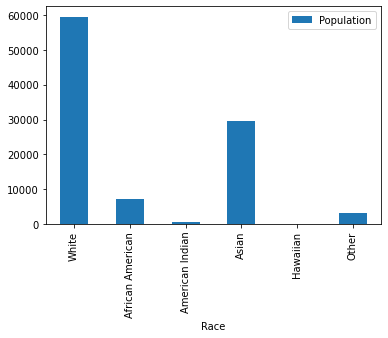

In [45]:
edison_demograph.plot.bar(x='Race',y='Population')

In [46]:
df1 = dataframe_merged.groupby('categories').count()
df1


,name,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,Cluster Labels
categories,,,,,,,,,,,,,,,
Asian Restaurant,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
Brazilian Restaurant,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
Breakfast Spot,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
Business Service,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
Chinese Restaurant,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4
Dim Sum Restaurant,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
Diner,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2
Food,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5
Food Court,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='name'>

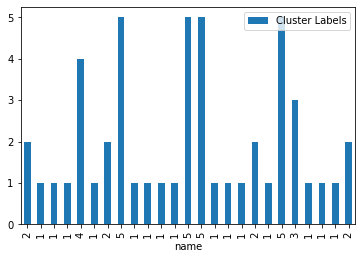

In [47]:
df1.plot.bar(x='name',y='Cluster Labels')
#df1.plot.bar(x='categories',y='name')